<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/ML%E5%9F%BA%E7%A1%80001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
# 加载必要的库

import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [ ]:
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
from sklearn import ensemble

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 第一步：加载源数据集

In [ ]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/titatrain.csv

--2024-02-14 06:52:21--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/titatrain.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titatrain.csv.1’

titatrain.csv.1     100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2024-02-14 06:52:21 (5.19 MB/s) - ‘titatrain.csv.1’ saved [61194/61194]



In [ ]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/titatest.csv

--2024-02-14 06:52:21--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/titatest.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘titatest.csv.1’

titatest.csv.1      100%[===================>]  27.96K  --.-KB/s    in 0.002s  

2024-02-14 06:52:21 (12.8 MB/s) - ‘titatest.csv.1’ saved [28629/28629]



In [ ]:
data_raw = pd.read_csv('titatrain.csv')
data_val = pd.read_csv('titatest.csv')

In [ ]:
# 显示部分数据
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 列名称转换为小写格式

data_raw.columns = data_raw.columns.str.lower() # 转换为小写

data_val.columns = data_val.columns.str.lower() # 转换为小写

In [ ]:
data_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='survived', ylabel='count'>

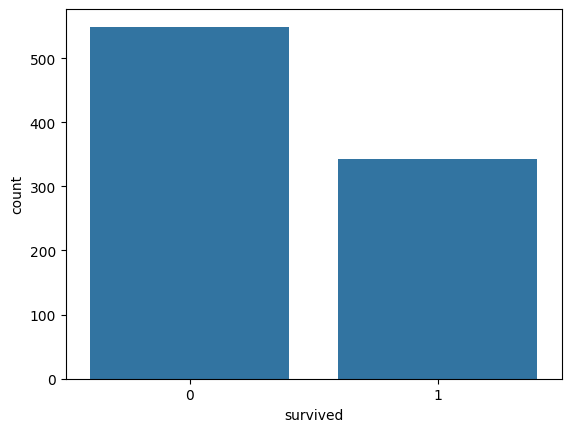

In [ ]:
# 绘制图形

sns.countplot(x='survived',data=data_raw)

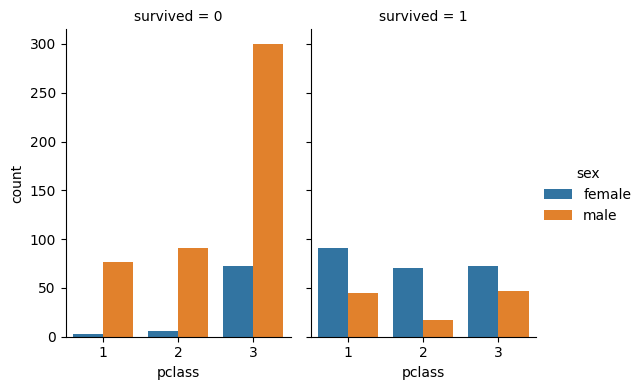

In [ ]:
# 绘制图形

sns.catplot(x='pclass',hue='sex',col='survived',data=data_raw,kind='count',height=4,aspect=0.7)

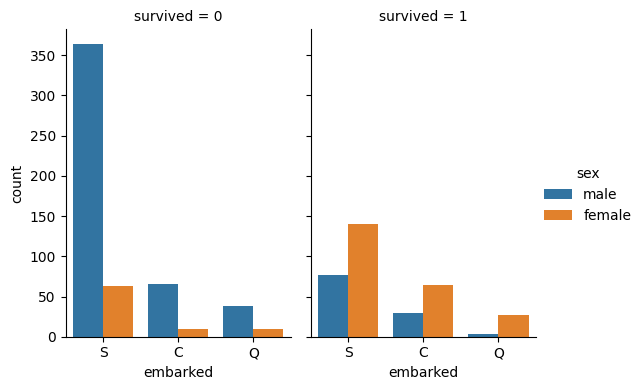

In [ ]:
# 绘制图形

sns.catplot(x='embarked',hue='sex',col='survived',data=data_raw,kind='count',height=4,aspect=0.7)

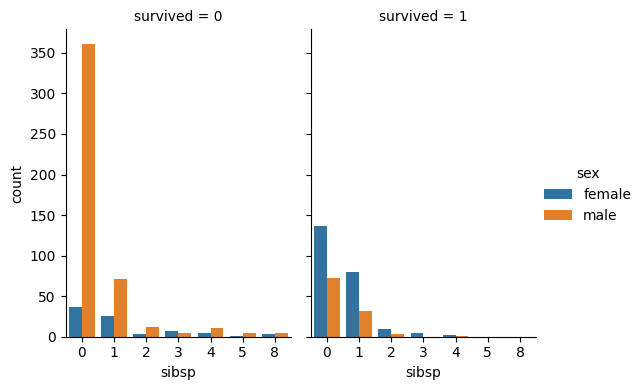

In [ ]:
# 绘制图形

sns.catplot(x='sibsp',hue='sex',col='survived',data=data_raw,kind='count',height=4,aspect=0.7)

In [ ]:
# 合并两个数据集，进行统一的清洗

data_all = [data_raw, data_val]

### 第二步：数据清洗

In [ ]:
data_raw.isnull().sum() # 查看训练集中的空值

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [ ]:
data_val.isnull().sum() # 查看验证集中的空值

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [ ]:
# 对源数据集进行描述

data_raw.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# 对原始数据集（训练集+验证集）进行清理

for dataset in data_all:
    # 补足空缺值
    dataset['age'].fillna(dataset['age'].median(), inplace=True)
    dataset['fare'].fillna(dataset['fare'].median(), inplace=True)
    dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)

In [ ]:
# 删除一些字段
drop_columns = ['cabin', 'passengerid', 'ticket']

data_raw.drop(drop_columns, axis=1, inplace=True)

data_val.drop(drop_columns, axis=1, inplace=True)

In [ ]:
data_raw.isnull().sum() # 训练集

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
data_val.isnull().sum() # 验证集

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### 第三步：特征构建

#### (一) 构建新的字段，基于value_counts()和apply()

In [ ]:
for dataset in data_all:
    # 构建新的字段：
    # （1）家庭规模 family_size：sibsp + parch
    dataset['family_size'] = dataset['sibsp'] + dataset['parch'] + 1
    # （2）单身 single：1 单身 / 0 非单身
    dataset['single'] = 1
    dataset['single'].loc[dataset['family_size'] > 1] = 0
    # （3）身份 title
    dataset['title'] = dataset['name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    # （4）票价 fare_bin
    dataset['fare_bin'] = pd.qcut(dataset['fare'], 4) #根据票价，分成4组（每组的元素个数一致）
    # （5）年龄 age_bin
    dataset['age_bin'] = pd.cut(dataset['age'].astype(int), 5) #根据年龄，分成5组（每组的元素不一致）

<ipython-input-27-6e731711576e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['single'].loc[dataset['family_size'] > 1] = 0
<ipython-input-27-6e731711576e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['single'].loc[dataset['family_size'] > 1] = 0


In [ ]:
dataset.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


In [ ]:
# 根据title统计人数

data_raw['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [ ]:
title_names = (data_raw['title'].value_counts() < 10)

In [ ]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
the Countess     True
Capt             True
Ms               True
Sir              True
Lady             True
Mme              True
Don              True
Jonkheer         True
Name: title, dtype: bool

In [ ]:
# title 将那些称谓所在的人数小于10的数据，全部归为一类：other
data_raw['title'] = data_raw['title'].apply(lambda x : 'other' if title_names[x] else x)

In [ ]:
data_raw['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: title, dtype: int64

In [ ]:
data_raw['survived'].groupby(data_raw['title']).mean()

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: survived, dtype: float64

#### (二) 构建新的字段，基于scikit-learn中的LabelEncoder()

In [ ]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [ ]:
label = LabelEncoder()

In [ ]:
for dataset in data_all:
    # （1）新字段：sex_code
    dataset['sex_code'] = label.fit_transform(dataset['sex'])
    # （2）新字段：embarked_code
    dataset['embarked_code'] = label.fit_transform(dataset['embarked'])
    # （3）新字段：title_code
    dataset['title_code'] = label.fit_transform(dataset['title'])
    # （4）新字段：age_bin_code
    dataset['age_bin_code'] = label.fit_transform(dataset['age_bin'])
    # （5）新字段：fare_bin_code
    dataset['fare_bin_code'] = label.fit_transform(dataset['fare_bin'])

In [ ]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin,sex_code,embarked_code,title_code,age_bin_code,fare_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1


In [ ]:
# 列的名称

data_raw.columns.tolist()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'family_size',
 'single',
 'title',
 'fare_bin',
 'age_bin',
 'sex_code',
 'embarked_code',
 'title_code',
 'age_bin_code',
 'fare_bin_code']

In [ ]:
Target = ['survived'] # 标签

### 方式一：特征选择

In [ ]:
data_columns_one = ['sex', 'pclass', 'embarked', 'title', 'sibsp', 'parch', 'age', 'fare', 'family_size',
                    'single']

In [ ]:
columns_one = Target + data_columns_one

### 方式二：特征选择

In [ ]:
data_columns_two = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'sibsp', 'parch', 'age', 'fare']

In [ ]:
columns_two = Target + data_columns_two

### 方式三：特征选择

In [ ]:
data_columns_three = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'family_size', 'age_bin_code', 'fare_bin_code']

In [ ]:
columns_three = Target + data_columns_three

### 通过Pandas中的 get_dummies() 进行编码

In [ ]:
data_one_dummy = pd.get_dummies(data_raw[data_columns_one])

In [ ]:
data_one_dummy_list = data_one_dummy.columns.tolist()

In [ ]:
len(data_one_dummy_list)

17

In [ ]:
print(data_one_dummy_list)

['pclass', 'sibsp', 'parch', 'age', 'fare', 'family_size', 'single', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_other']


### 获取训练集和测试集

### 方式一：训练集和测试集

In [ ]:
X_train_one, X_test_one, y_train_one, y_test_one = model_selection.train_test_split(data_one_dummy[data_one_dummy_list],
                                                                                    data_raw[Target],
                                                                                    random_state = 0)

In [ ]:
X_train_one.shape

(668, 17)

In [ ]:
X_test_one.shape

(223, 17)

### 方式二：训练集和测试集

In [ ]:
X_train_two, X_test_two, y_train_two, y_test_two = model_selection.train_test_split(data_raw[data_columns_two],
                                                                                    data_raw[Target],
                                                                                    random_state = 0)

In [ ]:
X_train_two.shape

(668, 8)

In [ ]:
X_test_two.shape

(223, 8)

### 方式三：训练集和测试集

In [ ]:
X_train_three, X_test_three, y_train_three, y_test_three = model_selection.train_test_split(data_raw[data_columns_three],
                                                                                            data_raw[Target],
                                                                                            random_state=0)

In [ ]:
X_train_three.shape

(668, 7)

In [ ]:
X_test_three.shape

(223, 7)

### 随机森林算法实现

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_features='auto',
                            random_state=1,
                            n_jobs=-1)

In [ ]:
param_gird = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [1, 5, 10],
    'min_samples_split' : [2, 4, 10, 12, 16],
    'n_estimators' : [50, 100, 400, 700, 1000]
}

In [ ]:
gs = GridSearchCV(estimator=rf,
                  param_grid=param_gird,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

## 数据一

### 在train上进行训练

In [ ]:
gs = gs.fit(X_train_one, y_train_one)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print(gs.best_score_)

0.8323839534601868


In [ ]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [ ]:
# 创建一个对象

rf2 = RandomForestClassifier(criterion='entropy',
                             min_samples_leaf=5,
                             min_samples_split=12,
                             n_estimators=50,
                             n_jobs=-1,
                             random_state=1)

In [ ]:
rf2.fit(X_train_one, y_train_one)

<ipython-input-68-eafc9b066f67>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train_one, y_train_one)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=50, n_jobs=-1,
                       random_state=1)

In [ ]:
X_train_one.head()

,pclass,sibsp,parch,age,fare,family_size,single,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_other
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,1,0,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,1,0,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,1,0,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,1,0,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,1,0


In [ ]:
# 根据特征的重要性排序
pd.concat((pd.DataFrame(X_train_one.iloc[:, 1:].columns, columns=['Variable']),
           pd.DataFrame(rf2.feature_importances_, columns=['importance'])),
           axis=1).sort_values(by='importance', ascending=False)

,Variable,importance
7,sex_male,0.158834
14,title_Mrs,0.150353
4,family_size,0.138901
8,embarked_C,0.123423
3,fare,0.108769
0,sibsp,0.092098
5,single,0.053961
1,parch,0.042367
15,title_other,0.034270
2,age,0.019245


### 在test上进行预测

In [ ]:
pred = rf2.predict(X_test_one)

In [ ]:
pred_df = pd.DataFrame(pred, columns=['survived'])

In [ ]:
pred_df.head()

,survived
0,0
1,0
2,0
3,1
4,1


## 数据二

### 在train上进行训练

In [74]:
gs = gs.fit(X_train_two, y_train_two)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [75]:
print(gs.best_score_)

0.8278861821462719


In [76]:
print(gs.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [77]:
# 创建一个对象

rf3 = RandomForestClassifier(criterion='gini',
                             min_samples_leaf=5,
                             min_samples_split=2,
                             n_estimators=1000,
                             n_jobs=-1,
                             random_state=1)

In [78]:
rf3.fit(X_train_two, y_train_two)

<ipython-input-78-6d4ccc74b008>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(X_train_two, y_train_two)


RandomForestClassifier(min_samples_leaf=5, n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [79]:
X_train_two.head()

,sex_code,pclass,embarked_code,title_code,sibsp,parch,age,fare
105,1,3,2,2,0,0,28.0,7.8958
68,0,3,2,1,4,2,17.0,7.9250
253,1,3,2,2,1,0,30.0,16.1000
320,1,3,2,2,0,0,22.0,7.2500
706,0,2,2,3,0,0,45.0,13.5000


In [80]:
# 根据特征的重要性排序
pd.concat((pd.DataFrame(X_train_two.iloc[:, 1:].columns, columns=['Variable']),
           pd.DataFrame(rf3.feature_importances_, columns=['importance'])),
           axis=1).sort_values(by='importance', ascending=False)

,Variable,importance
0,pclass,0.335425
3,sibsp,0.184573
7,NaN,0.155841
1,embarked_code,0.112747
6,fare,0.102961
4,parch,0.051700
2,title_code,0.030265
5,age,0.026487


### 在test上进行预测

In [81]:
pred = rf3.predict(X_test_two)

In [82]:
pred_df = pd.DataFrame(pred, columns=['survived'])

In [83]:
pred_df.head()

,survived
0,0
1,0
2,0
3,1
4,1


### ！！！注意：在最终的test.csv上预测

In [84]:
data_val_dummy = pd.get_dummies(data_val[data_columns_one])

In [85]:
data_val_dummy.head()

,pclass,sibsp,parch,age,fare,family_size,single,sex_female,sex_male,embarked_C,...,embarked_S,title_Col,title_Dona,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Ms,title_Rev
0,3,0,0,34.5,7.8292,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,3,1,0,47.0,7.0000,2,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,0,0,62.0,9.6875,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,27.0,8.6625,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,3,1,1,22.0,12.2875,3,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [86]:
data_val_dummy_list = data_val_dummy.columns.tolist()

In [87]:
data_val_dummy_list

['pclass',
 'sibsp',
 'parch',
 'age',
 'fare',
 'family_size',
 'single',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'title_Col',
 'title_Dona',
 'title_Dr',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Ms',
 'title_Rev']